In [3]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

np.random.seed(1) # set a seed so that the results are consistent

## code of load_planar_dataset:
```python
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y
```

As we could see, this def plot some function in polar coordinates in two adjacnet regions, then use `np.c_` to cenvert it into Cartesian coordinate.

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


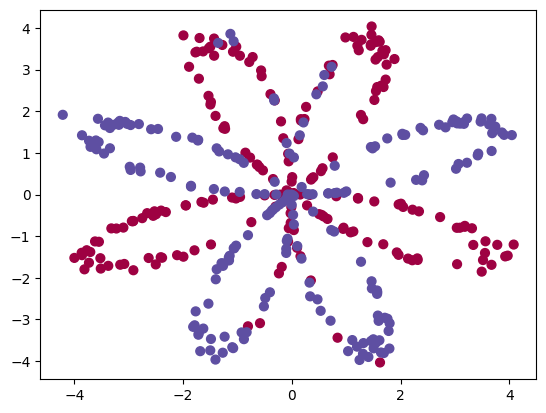

In [4]:
shape_X = None
shape_Y = None
m = None

X, Y = load_planar_dataset()

X = np.array(X)
Y = np.array(Y)

shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

## Simple examples for sklearn

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


d:\software\anaconda3\envs\deeplearning\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\liang\AppData\Local\Temp\ipykernel_39824\2278611157.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +


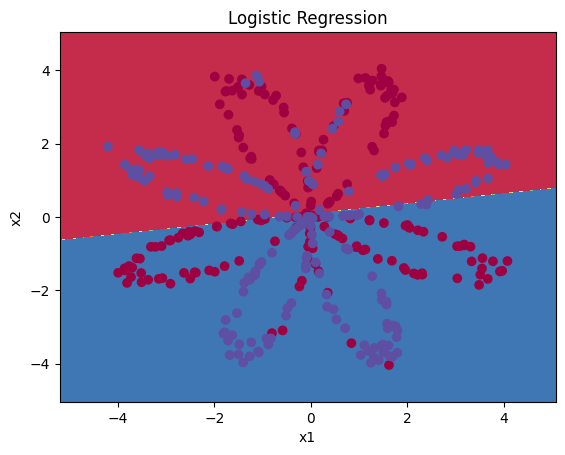

In [5]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [10]:
def layer_sizes(X, Y):

    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]

    return n_x, n_h, n_y

X_assess, Y_assess = layer_sizes_test_case()
n_x, n_h, n_y = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [13]:
def initialize_parameters(n_x, n_h, n_y):

    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))

    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.63699565  0.19091548]
 [ 2.10025514  0.12015895]
 [ 0.61720311  0.30017032]
 [-0.35224985 -1.1425182 ]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.34934272 -0.20889423  0.58662319  0.83898341]]
b2 = [[0.]]


## Some equation for backward propagation with multiple hidden layers:

$$ dZ^{[l]} = dA^{[l]} \times g'^{[l]} (Z^{[l]}) $$
$$ dW^{[l]} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{1}{m} np.sum(dZ^{[l]}, \text{axis} = 1, \text{keepdims} = \text{True}) $$
$$ dA^{[l-1]} = W^{[l] T} dZ^{[l]} $$

for model with one hidden layer, we have:

$$ dZ^{[2]} = dA^{[2]} \times g'^{[2]} (Z^{[2]}) = A^{[2]} - Y $$
$$ dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T} = (A^{[2]} - Y)A^{[1]T} $$
$$ db^{[2]} = \frac{1}{m} np.sum(A^{[2]} - Y, \text{axis} = 1)$$

$$ dA^{[1]} = W^{[2] T} dZ^{[2]} $$
$$ dZ^{[1]} = W^{[2] T} dZ^{[2]} \times g'^{[1]} (Z^{[1]}) $$



In [16]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

    

-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431


## Cost function

$$ J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} $$

**Notice:**
The cost function only depends on $A^{[2]}$.

In [28]:
def compute_cost(A2, Y, parameters):

    m = Y.shape[1]
    cost = None


    cost = -(1 / m) * (np.dot(Y, np.log(A2).T) + np.dot(1 - Y, np.log(1 - A2).T))

    cost = np.squeeze(cost)


    return cost

def compute_cost1(A2, Y, parameters):
    m = Y.shape[1]
    cost = None


    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = -np.sum(logprobs) / m

    cost = np.squeeze(cost)


    return cost

A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))
print("cost = " + str(compute_cost1(A2, Y_assess, parameters)))



cost = 0.6929198937761265
cost = 0.6929198937761266


In [29]:
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), (1 - np.power(A1, 2)))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)

    grads = {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}
    
    return grads

parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [36]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
    
    return parameters


parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [39]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)

        cost = compute_cost(A2, Y, parameters)

        grads = backward_propagation(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads)

        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
    

Cost after iteration 0: 0.770370
[[0.50474505 0.56160503 0.35069135]]
Cost after iteration 1000: -inf
[[1.         0.         0.28089068]]
Cost after iteration 2000: -inf
[[1.         0.         0.28197611]]
Cost after iteration 3000: -inf
[[1.         0.         0.28234588]]
Cost after iteration 4000: -inf
[[1.         0.         0.28253238]]


C:\Users\liang\AppData\Local\Temp\ipykernel_39824\1975095456.py:7: RuntimeWarning: divide by zero encountered in log
  cost = -(1 / m) * (np.dot(Y, np.log(A2).T) + np.dot(1 - Y, np.log(1 - A2).T))


Cost after iteration 5000: -inf
[[1.         0.         0.28264481]]
Cost after iteration 6000: -inf
[[1.      0.      0.28272]]
Cost after iteration 7000: -inf
[[1.         0.         0.28277382]]
Cost after iteration 8000: -inf
[[1.         0.         0.28281425]]
Cost after iteration 9000: -inf
[[1.         0.         0.28284574]]
W1 = [[ 7.53831683 -1.20772519]
 [ 3.74341408 -5.77858313]
 [-7.53831138  1.20773002]
 [ 4.14296415 -5.36353386]]
b1 = [[-3.81051705]
 [-2.20590894]
 [ 3.81053144]
 [-2.32782142]]
W2 = [[ 6011.30162343  6036.36128506 -6011.30712283  6037.28968508]]
b2 = [[-53.03525576]]


In [40]:
def predict(parameters, X):

    A2, cache = forward_propagation(X, parameters)
    predict = (A2 > 0.5)

    return predict

parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.770532
[[0.68493056 0.39988814 0.40171537 0.38960851 0.66656573 0.34675496
  0.68531758 0.40865411 0.65185868 0.62302011 0.68849055 0.35136941
  0.63489845 0.62589261 0.68634412 0.56740202 0.67019603 0.60962569
  0.68637416 0.68979108 0.62212756 0.68316406 0.68905461 0.6891578
  0.67769499 0.68466327 0.6877977  0.67180199 0.6874941  0.6806097
  0.68715745 0.68989329 0.68983798 0.69139146 0.68911048 0.67909244
  0.68403118 0.66535094 0.31798562 0.58564612 0.67494762 0.68807079
  0.68651768 0.30372847 0.63235138 0.68097405 0.58169699 0.29465608
  0.57681955 0.33266581 0.37648947 0.61237607 0.66521461 0.60629821
  0.46149747 0.30868193 0.30576983 0.30016654 0.31526211 0.29762956
  0.49172226 0.29159046 0.30082625 0.32302981 0.29824121 0.30993779
  0.29102868 0.30567531 0.43796474 0.43475556 0.46676815 0.3094168
  0.29518029 0.2978419  0.29102827 0.5083934  0.29563703 0.32081738
  0.29033424 0.3344091  0.29173117 0.29100974 0.2957296  0.32511219
  0.30554097 0.306

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

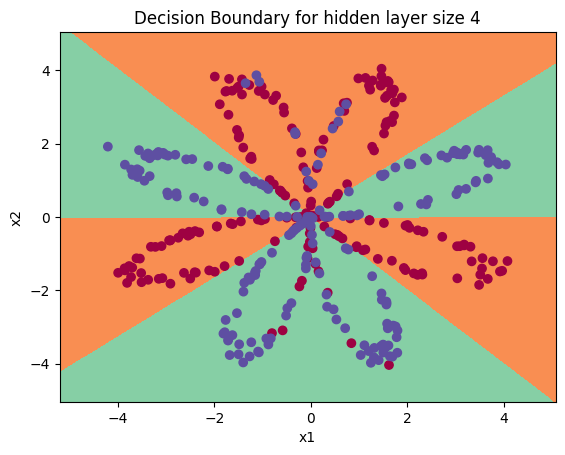

In [41]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))